In [1]:
from configs.RecursiveVPSDE.Markovian_20DLorenz.recursive_Markovian_PostMeanScore_20DLorenz_Chaos_T256_H05_tl_110data_StbleTgt import get_config as config20
from configs.RecursiveVPSDE.Markovian_8DLorenz.recursive_Markovian_PostMeanScore_8DLorenz_Chaos_T256_H05_tl_110data_StbleTgt import get_config as config8
from configs.RecursiveVPSDE.Markovian_12DLorenz.recursive_Markovian_PostMeanScore_12DLorenz_Chaos_T256_H05_tl_110data_StbleTgt import get_config as config12
import matplotlib.pyplot as plt
import numpy as np
from utils.resource_logger import wallclock_and_system_metrics

In [3]:
nad8, nad12, nad20 = wallclock_and_system_metrics(config8().nadaraya_resource_logging_path, inclusive=False), wallclock_and_system_metrics(config12().nadaraya_resource_logging_path, inclusive=False), wallclock_and_system_metrics(config20().nadaraya_resource_logging_path, inclusive=False)


In [32]:
score8

{'progress_name': 'epoch',
 'span_units': 238.0,
 'wall_clock_h_total': 25.686830335325666,
 'wall_clock_per_unit_h': 0.10792785855178852,
 'cpu_avg_pct': 10.097795071335927,
 'cpu_peak_pct': 11.0,
 'ram_avg_gib': 24.90332420233463,
 'ram_peak_gib': 25.140064,
 'gpu_util_avg_pct': 99.82101167315174,
 'gpu_util_peak_pct': 100.0,
 'gpu_mem_avg_gib': 3.23072,
 'gpu_mem_peak_gib': 3.23072}

In [4]:
score8, score12, score20 = wallclock_and_system_metrics(config8().resource_logging_path, inclusive=False), wallclock_and_system_metrics(config12().resource_logging_path, inclusive=False), wallclock_and_system_metrics(config20().resource_logging_path, inclusive=False)


In [8]:
dims = [8, 12, 20]

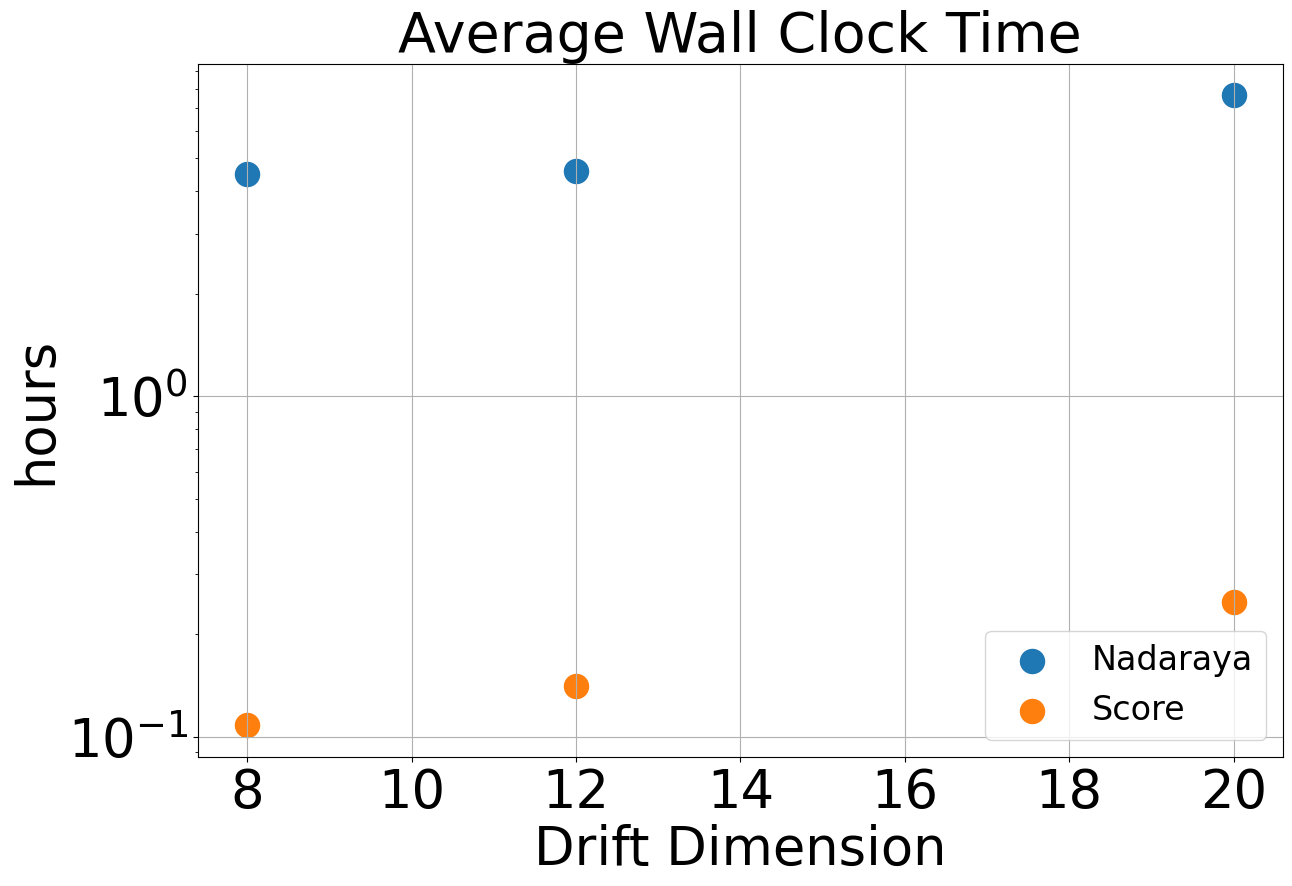

In [40]:
from matplotlib.ticker import MaxNLocator, MultipleLocator, FormatStrFormatter

fig, ax = plt.subplots(figsize=(14,9))
plt.scatter(dims, [nad8["wall_clock_per_unit_h"], nad12["wall_clock_per_unit_h"], nad20["wall_clock_per_unit_h"]],s=300, label="Nadaraya")
plt.scatter(dims, [score8["wall_clock_per_unit_h"], score12["wall_clock_per_unit_h"], score20["wall_clock_per_unit_h"]], label="Score", s=300)
plt.title(rf"Average Wall Clock Time",fontsize=40)
plt.grid(True)
plt.yscale("log")
ax.tick_params(labelsize=38)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel(r"hours", fontsize=38)
plt.xlabel("Drift Dimension", fontsize=38)
plt.legend(fontsize=24)
plt.show()

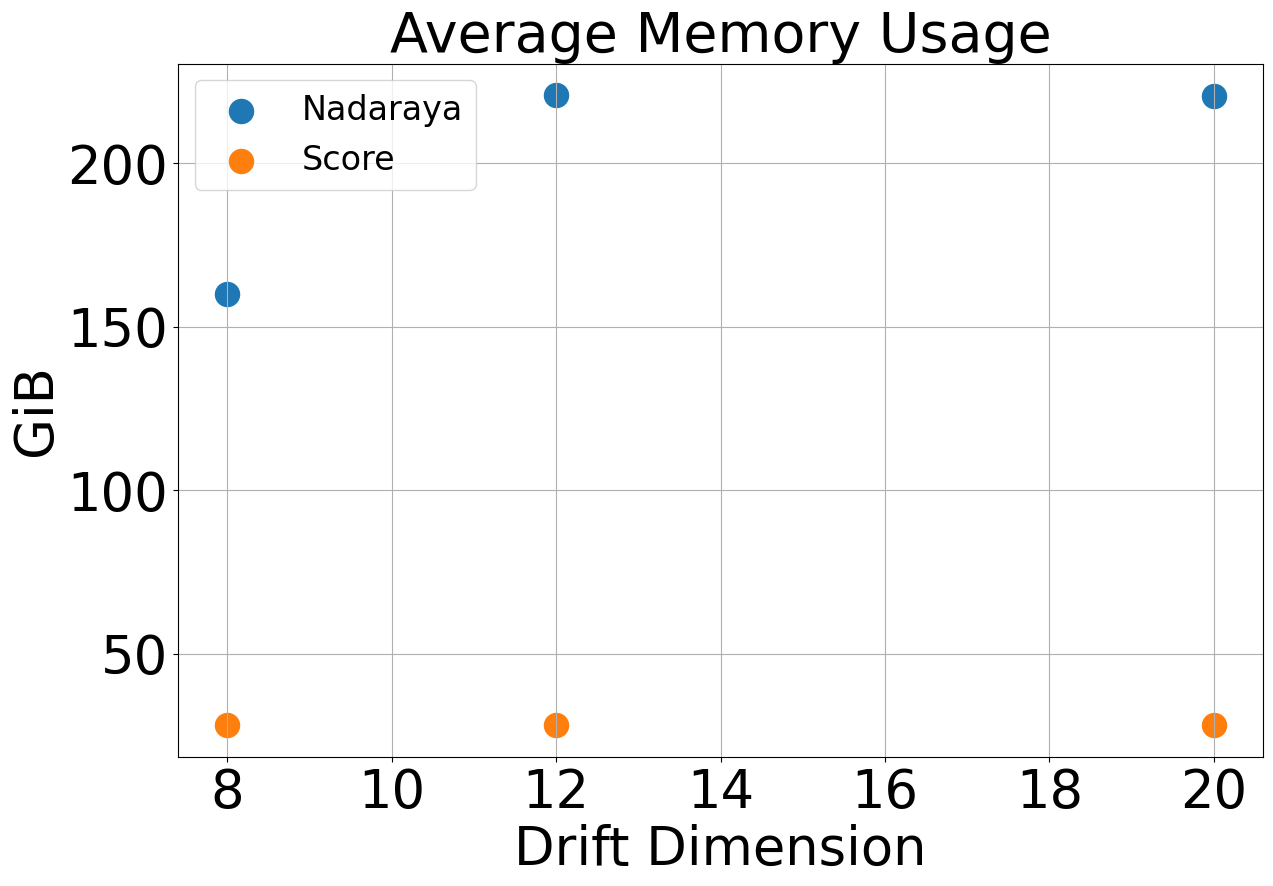

In [39]:
from matplotlib.ticker import MaxNLocator, MultipleLocator, FormatStrFormatter

fig, ax = plt.subplots(figsize=(14,9))
plt.scatter(dims, [nad8["ram_avg_gib"], nad12["ram_avg_gib"], nad20["ram_avg_gib"]],s=300, label="Nadaraya")
plt.scatter(dims, [score8["gpu_mem_avg_gib"]+score8["ram_avg_gib"], score12["gpu_mem_avg_gib"]+score12["ram_avg_gib"], score20["gpu_mem_avg_gib"]+score20["ram_avg_gib"]], label="Score", s=300)
plt.title(rf"Average Memory Usage",fontsize=40)
plt.grid(True)
ax.tick_params(labelsize=38)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel(r"GiB", fontsize=38)
plt.xlabel("Drift Dimension", fontsize=38)
plt.legend(fontsize=24)
plt.show()